In [1]:
from Louvain_algo import Louvain_algo
import networkx as nx
import utils

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[(1, 2), (1, 3), (2, 3), (3, 6), (3, 7), (3, 9), (4, 5), (4, 7), (4, 8), (5, 7), (5, 8), (6, 9), (7, 8), (8, 9)]


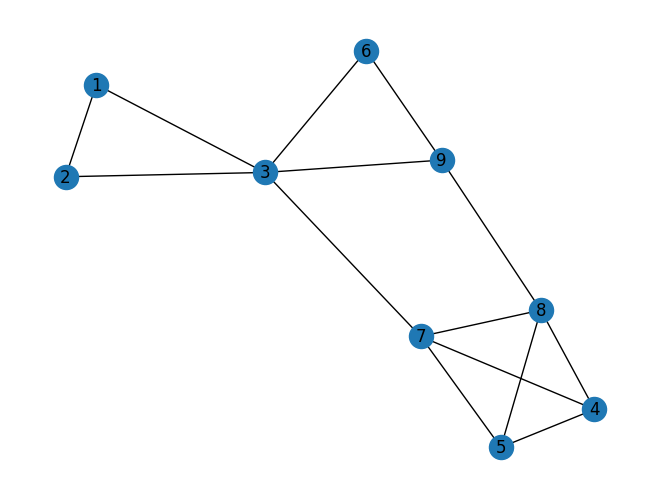

In [2]:
# Create a small graph
G = nx.Graph()

# Add nodes
G.add_node(1)
G.add_nodes_from([1,2, 3, 4, 5, 6, 7, 8, 9])

# Add edges
G.add_edges_from([(1,2),(1, 3),(2,3), (3,6),(3,7),(3,9),(4,5),(4,7),(4,8),(5,7),(5,8),(6,9),(7,8),(8,9)])

# Draw the graph
nx.draw(G, with_labels=True)
print(G.nodes)
print(G.edges)


In [3]:
%%time
algo = Louvain_algo(G)
communities = algo.run()

passage 1
start iteration
changes 6
start iteration
changes 0
There were 3 communities detected in passage 1.
modularity 0.32908163265306123
end of passage 1 0.0009050369262695312
passage 2
creating hypergraph
hypergraph created 8.869171142578125e-05
start iteration
gains {0.02806122448979591: 2, -0.25: 1}
gains {-0.3571428571428571: 2}
gains {0.02806122448979591: 2, -0.10714285714285714: 1}
changes 1
modularity =  -0.2222222222222222
start iteration
gains {0.02806122448979591: 2, -0.25: 1}
gains {-0.3571428571428571: 2}
gains {0.02806122448979591: 2, -0.10714285714285714: 1}
changes 0
modularity =  -0.2222222222222222
The number of communities was reduced to  3
hyper_com {0: set(), 1: {1}, 2: {0, 2}}
new_modularity: 0.35714285714285715
end of passage 2 0.000324249267578125
passage 3
creating hypergraph
start iteration
gains {0.12244897959183673: 2}
gains {0.12244897959183673: 2}
changes 1
modularity =  0.0
start iteration
gains {0.12244897959183673: 2}
gains {0.12244897959183673: 2}
c

In [4]:
communities

{1: {4, 5, 7, 8}, 2: {1, 2, 3, 6, 9}}

In [5]:
print(communities)
print("There are",len(communities),"communities")
print(nx.community.modularity(G,list(communities.values())))
list(communities.values())

{1: {8, 4, 5, 7}, 2: {1, 2, 3, 6, 9}}
There are 2 communities
0.35714285714285715


[{4, 5, 7, 8}, {1, 2, 3, 6, 9}]

In [6]:
%%time
communities_built = nx.community.louvain_communities(G)
print("There are",len(communities_built),"communities.")
print(nx.community.modularity(G,communities_built))
print(communities_built)

There are 2 communities.
0.35714285714285715
[{1, 2, 3, 6, 9}, {8, 4, 5, 7}]
CPU times: user 4.75 ms, sys: 1.04 ms, total: 5.79 ms
Wall time: 5.18 ms


In [7]:
graph = nx.read_edgelist("data/CA-GrQc.txt", nodetype = int)
N = nx.number_of_nodes(graph)
m = nx.number_of_edges(graph)
print("The number of nodes in the graph is: ",N)
print("The number of edges in the graph is:",m)
print("Is connected",nx.is_connected(graph))


The number of nodes in the graph is:  5242
The number of edges in the graph is: 14496
Is connected False


In [8]:
s = list(nx.connected_components(graph))
G = graph.subgraph(s[0])
N = nx.number_of_nodes(G)
m = nx.number_of_edges(G)
print("The number of nodes in the graph is: ",N)
print("The number of edges in the graph is:",m)

The number of nodes in the graph is:  4158
The number of edges in the graph is: 13428


In [9]:
algo = Louvain_algo(G)

In [10]:
communities = algo.run(2)

passage 1
start iteration
changes 3097
start iteration
changes 832
start iteration
changes 166
start iteration
changes 33
start iteration
changes 8
start iteration
changes 0
There were 839 communities detected in passage 1.
modularity 0.6979621158718573
end of passage 1 10.99223279953003
passage 2
creating hypergraph
hypergraph created 0.06177854537963867
start iteration
gains {0.0001469903275661481: 1, 7.336206055859519e-05: 123, 7.407194442248241e-05: 783, 7.269654443620093e-05: 51, 7.229723476276435e-05: 110, 0.00014841009529392252: 2, 7.358389926605995e-05: 192, 6.852597673586348e-05: 8, 7.340642830008814e-05: 753, 6.790482835496216e-05: 573}
gains {0.00014552619209688068: 2, 6.983482510990555e-05: 223, 0.00021279878013556828: 68, 7.178700573559541e-05: 16, 0.00021877733330174351: 167, 6.898074608616624e-05: 115, 7.276309604844034e-05: 248, 6.739459932779322e-05: 284, 7.264108475933473e-05: 442}
gains {0.00014841009529392252: 2, 7.087746703498991e-05: 157, 7.28074637899333e-05: 217

In [11]:
#does G has self_loops?
G.has_edge(1343,1343)

True

In [12]:
print(communities)
print("There are",len(communities),"communities")
print(nx.community.modularity(G,list(communities.values())))



{2: {13056, 14982, 10310, 5233, 24372, 14550, 1787, 1279}, 11: {17156, 16261, 392, 17804, 3853, 16270, 8718, 15251, 20375, 17956, 3878, 23721, 7601, 2485, 14265, 18622, 22463, 19525, 16584, 11468, 10062, 11470, 20432, 3927, 3937, 5218, 3173, 16102, 21866, 5230, 18543, 12406}, 16: {16258, 6667, 25628, 4125, 10912, 16676, 21927, 6825, 14123, 22836, 10805, 2239, 19783, 21194, 1356, 6626, 25069, 22894, 10351, 11638}, 20: {17794, 11401, 8458, 2959, 4242, 11925, 13205, 2710, 4376, 11416, 8222, 5794, 5541, 26023, 5807, 14009, 26051, 15301, 20934, 18246, 13659, 13026, 10601, 15082, 9712, 7025, 26100, 21495, 11640, 25209, 10879}, 22: {5634, 899, 1796, 15235, 13955, 9735, 17670, 13068, 19724, 22415, 7442, 16148, 3096, 26138, 24731, 7450, 23967, 18209, 19234, 2341, 8614, 19495, 17192, 17191, 18222, 24371, 3508, 18227, 14003, 18235, 5052, 23227, 4027, 11712, 20168, 2505, 6732, 2127, 5712, 5840, 22609, 7768, 3032, 12641, 6376, 15081, 16106, 5740, 18286, 6642, 17396, 18549, 885, 19445, 4472, 17277},

In [13]:
communities_built = nx.community.louvain_communities(G,seed=2)
print("There are",len(communities_built),"communities.")
print(nx.community.modularity(G,communities_built))

There are 41 communities.
0.8473245786018466


In [14]:
nodes,edges = utils.Load_data("data/musae_facebook_target.csv","data/musae_facebook_edges.csv")
G = utils.Create_Graph(nodes=nodes , edges=edges)

In [15]:
algo = Louvain_algo(G)

In [16]:
communities = algo.run(2)

passage 1
start iteration
changes 18832
start iteration
changes 7425
start iteration
changes 2087
start iteration
changes 797
start iteration
changes 410
start iteration
changes 328
start iteration
changes 188
start iteration
changes 92
start iteration
changes 60
start iteration
changes 32
start iteration
changes 12
start iteration
changes 4
start iteration
changes 0
There were 1838 communities detected in passage 1.
modularity 0.7376637728712642
end of passage 1 301.9613838195801
passage 2
creating hypergraph
hypergraph created 0.1871190071105957
start iteration
changes 1586
modularity =  0.2097516283319236
start iteration
changes 461
modularity =  0.28344333516739745
start iteration
changes 53
modularity =  0.28991654388694
start iteration
changes 8
modularity =  0.2905840922432463
start iteration
changes 0
modularity =  0.2905840922432463
The number of communities was reduced to  1838
hyper_com {0: set(), 1: set(), 2: set(), 3: set(), 4: set(), 5: set(), 6: set(), 7: set(), 8: set()

In [17]:
len(communities)

235

In [18]:
nx.community.modularity(G,list(communities.values()))
print(nx.community.modularity(G,list(communities.values())))
print("There are",len(communities),"communities.")

0.8074419024147258
There are 235 communities.


In [19]:
G.number_of_nodes()

22470

In [21]:
communities_built = nx.community.louvain_communities(G,seed=2)
print("There are",len(communities_built),"communities.")
nx.community.modularity(G,communities_built)

There are 60 communities.


0.8145420188092388

0.8145420188092388

In [24]:
communities_built

[{44,
  79,
  101,
  263,
  282,
  410,
  568,
  584,
  717,
  787,
  828,
  839,
  991,
  1126,
  1305,
  1394,
  1517,
  1523,
  1558,
  1618,
  1753,
  2052,
  2160,
  2432,
  2532,
  2864,
  2872,
  2971,
  3074,
  3103,
  3241,
  3372,
  3639,
  3852,
  3885,
  3981,
  4031,
  4077,
  4118,
  4278,
  4348,
  4401,
  4527,
  4751,
  4917,
  5010,
  5082,
  5165,
  5229,
  5317,
  5525,
  5589,
  5858,
  6147,
  6398,
  6635,
  6706,
  6745,
  6783,
  6836,
  7154,
  7228,
  7288,
  7355,
  7552,
  7554,
  7606,
  7800,
  7919,
  7978,
  8062,
  8641,
  8795,
  9034,
  9194,
  9288,
  9567,
  9641,
  9813,
  9996,
  9999,
  10625,
  10974,
  11137,
  11173,
  11248,
  11264,
  11286,
  11329,
  11349,
  11375,
  11473,
  11850,
  12025,
  12514,
  12745,
  12774,
  12870,
  13074,
  13140,
  13328,
  13383,
  13408,
  13675,
  13922,
  14016,
  14053,
  14127,
  14236,
  14703,
  14831,
  14935,
  14984,
  15332,
  15389,
  15416,
  15490,
  15880,
  15908,
  15930,
  16103,
  16105

In [13]:
G.subgraph([3466]).subgraph([937,5233,1031]).number_of_edges()

0

In [11]:
G.nodes()
G[3466]

AtlasView(FilterAtlas({937: {}, 5233: {}, 8579: {}, 10310: {}, 15931: {}, 17038: {}, 18720: {}, 19607: {}}, <function FilterAdjacency.__getitem__.<locals>.new_node_ok at 0x7e6435f10b80>))

In [10]:
%%time
nodes = range(5)
com = {0:{0,1},1:{2,3,4}}
com_inv = {0:0,1:0,2:1,3:1,4:1}
gains = {}
for n in nodes:
    if com_inv[n] not in gains.values():
        gains[1]=com_inv[n]
print(gains)


{1: 1}
CPU times: user 104 µs, sys: 74 µs, total: 178 µs
Wall time: 189 µs


In [11]:
%%time
nodes = range(5)
com = {0:{0,1},1:{2,3,4}}
com_inv = {0:0,1:0,2:1,3:1,4:1}
gains = {}
for n in nodes:
    gains[1]=com_inv[n]
print(gains)

{1: 1}
CPU times: user 135 µs, sys: 96 µs, total: 231 µs
Wall time: 246 µs


In [5]:
print("j")

j
